# LSTM Time Series Example

This tutorial is based on [Time Series Forecasting with the Long Short-Term Memory Network in Python](http://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) by Jason Brownlee.


## Part 1 - Data Prep

Before we get into the example, lets look at some visitor data from Yellowstone National park.

month
1979-01-01     23605
1979-02-01     31992
1979-03-01     17813
1979-04-01     34095
1979-05-01    108952
Name: visitors, dtype: int64


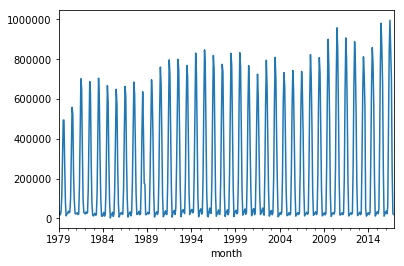

In [1]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('../data/yellowstone-visitors.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

The park's recreational visits are highly seasonable with the peak season in July.  The park tracks monthly averages from the last four years on it's [web site](https://www.nps.gov/yell/planyourvisit/visitationstats.htm).  A simple approach to predict the next years visitors, is to use these averages.

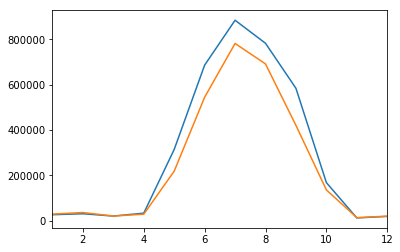

In [2]:
prev_4_years = series[-60:-12]
last_year = series[12:]

pred = prev_4_years.groupby(by=prev_4_years.index.month).mean()
pred.plot()

act = last_year.groupby(by=last_year.index.month).mean()
act.plot()

pyplot.show()

 ## Monthly Average Accuracy

Before this example uses Keras to predict visitors, we'll measure the monthly average method's root mean squared error.  While the monthly averages aren't compeletly accurate, this method is very simple and explainable.    

In [3]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(act, pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 79584.318
